In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
path = 'D:/Study/McGill University - MMA/Courses/INSY 695/Team Project/Data/'
df_raw = pd.read_csv(path+"media prediction and its cost NEW.csv")

In [3]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_raw.columns:
    uni_len = len(set(df_raw[c]))
    dtype = df_raw[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: int64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: int64 	 Column name: total_children
Number of unique values: 5 	 Datatype: int64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: int64 	 Column name: num_children_at_home
Number of unique values: 5 	 Datatype: int64 	 Column name: avg_cars_at home(approx).1


In [4]:
isolation_forest = IsolationForest(contamination = 0.05, max_samples = 100, random_state = 0)

# DataFrame to store the outlier predictions
outlier_preds = pd.DataFrame()

# Iterate all numerical columns
for col in num_cols:
    # Fit the Isolation Forest to the current column
    isolation_forest.fit(df_raw[[col]])
    
    # Get the outlier predictions for the current column
    outlier_pred = isolation_forest.predict(df_raw[[col]])
    
    # Add the outlier predictions as a new column in the outlier_preds DataFrame
    outlier_preds[col] = outlier_pred

outlier_preds

C:\Users\raman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\raman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have va

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,net_weight,units_per_case,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,cost
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60424,1,1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1
60425,1,1,-1,1,1,1,1,1,1,1,-1,1,1,1,1,1
60426,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
60427,1,1,1,1,1,1,1,1,1,1,1,1,-1,1,1,1


In [5]:
df_woOut = df_raw.iloc[outlier_pred == 1]
df_woOut

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,8670,5415,13610,1,1,1,1,1,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4,Bag Stuffers,USA,M,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",126.62
2,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3,Cash Register Lottery,USA,M,M,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",59.86
3,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2,High Roller Savings,USA,S,F,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio",84.16
4,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2,Cash Register Lottery,USA,M,F,...,18670,5415,3610,1,1,1,1,1,In-Store Coupon,95.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60424,Specialty,Carousel,Non-Consumable,2.76,1.3248,1,You Save Days,USA,M,F,...,15321,4294,2863,1,0,0,0,0,In-Store Coupon,95.25
60425,Specialty,Carousel,Non-Consumable,1.60,0.4960,1,Price Cutters,USA,S,F,...,15321,4294,2863,1,0,0,0,0,Sunday Paper,69.42
60426,Specialty,Carousel,Non-Consumable,5.52,2.5392,2,Weekend Markdown,USA,M,M,...,15321,4294,2863,1,0,0,0,0,"Sunday Paper, Radio, TV",67.51
60427,Specialty,Carousel,Non-Consumable,8.28,2.5668,3,Sales Days,Canada,S,M,...,27463,4193,2795,1,0,0,0,1,Sunday Paper,132.88


Text(0.5, 1.0, 'Correlation Matrix')

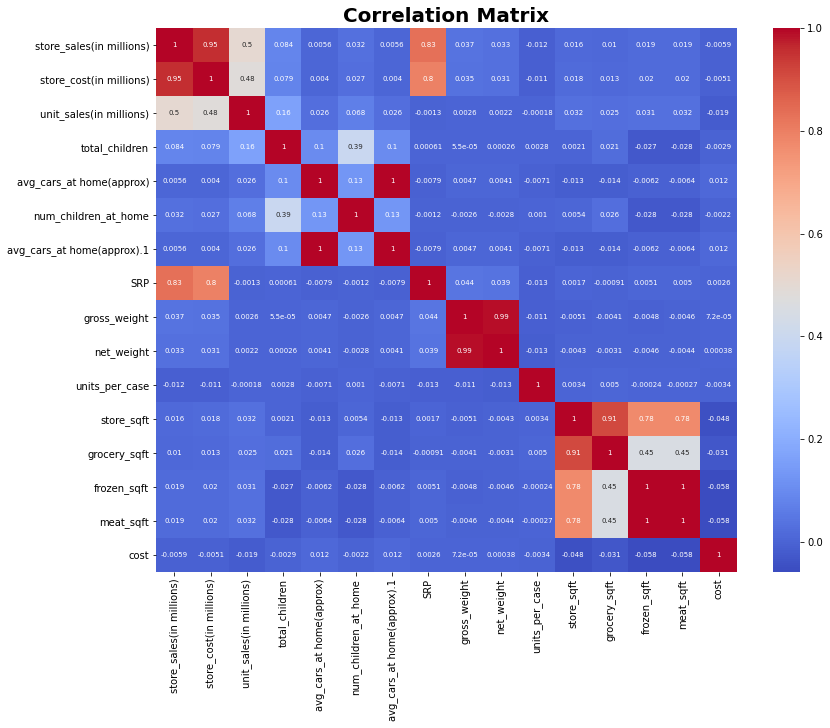

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

# Feature Engineering

According to the correlation matrix, we will do feature engineering to preserve as much data as possible at this stage while not facing multicollinearity.

In [7]:
df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
df_woOut['meat_to_total_ratio'] = df_woOut['meat_sqft'] / df_woOut['store_sqft']

<ipython-input-7-dd7f76fe2813>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['sales_to_cost_ratio'] = df_woOut['store_sales(in millions)'] / df_woOut['store_cost(in millions)']
<ipython-input-7-dd7f76fe2813>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_woOut['frozen_to_meat_ratio'] = df_woOut['frozen_sqft'] / df_woOut['meat_sqft']
<ipython-input-7-dd7f76fe2813>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [8]:
df_woOut = df_woOut.drop(['store_sales(in millions)', 'store_cost(in millions)', 'frozen_sqft', 'meat_sqft', 'grocery_sqft', 'store_sqft',
                          'gross_weight', 'avg_cars_at home(approx).1', 'grocery_sqft'], axis = 1)

In [9]:
num_cols, cate_cols, pre_dum_cols = [], [], []
for c in df_woOut.columns:
    uni_len = len(set(df_woOut[c]))
    dtype = df_woOut[c].dtypes

    if dtype == object:
        cate_cols.append(c)
    else: # dtype == float
        if uni_len == 2:
            pre_dum_cols.append(c)
        elif uni_len < 10:
            num_cols.append(c)
            print("Number of unique values: %d \t Datatype: %s \t Column name: %s" %(uni_len, dtype, c))
        else:
            num_cols.append(c)

Number of unique values: 6 	 Datatype: int64 	 Column name: unit_sales(in millions)
Number of unique values: 6 	 Datatype: int64 	 Column name: total_children
Number of unique values: 5 	 Datatype: int64 	 Column name: avg_cars_at home(approx)
Number of unique values: 6 	 Datatype: int64 	 Column name: num_children_at_home


Text(0.5, 1.0, 'Correlation Matrix')

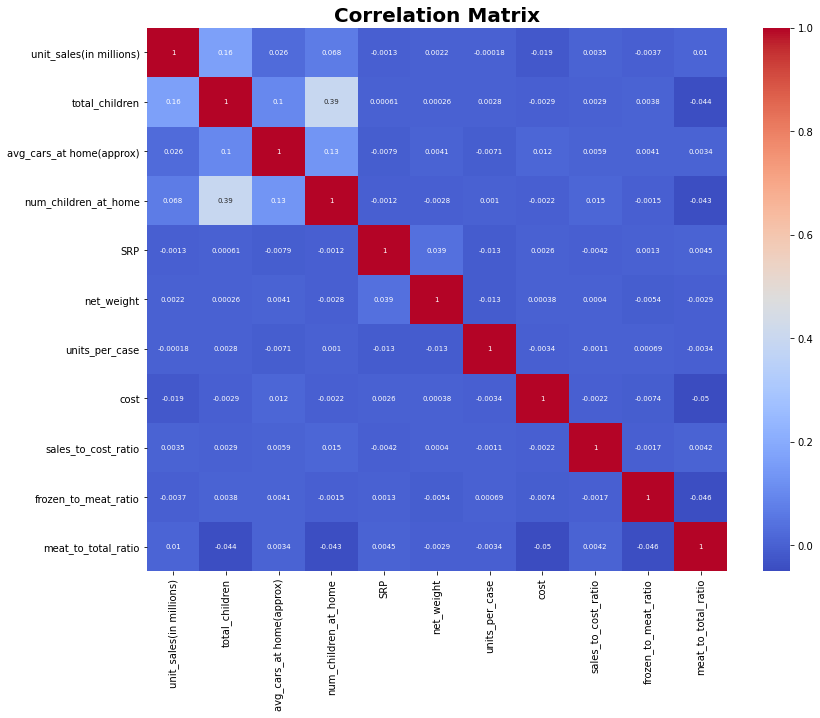

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (13, 10))

sns.heatmap(df_woOut[num_cols].corr(), annot = True, cmap = 'coolwarm', annot_kws = {'size' : 7})
plt.title("Correlation Matrix", fontsize = 20, fontweight = 'bold')

In [11]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
MinMax_scaled = min_max_scaler.fit_transform(df_woOut[cols])

MinMax_scaled

array([[ 0.2       , -0.6       , -0.5       , ...,  0.05405405,
        -1.        ,  1.        ],
       [ 0.2       , -0.6       , -0.5       , ...,  0.05405405,
         0.99945683, -0.75722849],
       [-0.2       , -1.        ,  1.        , ..., -0.80851064,
         0.99945683, -0.75722849],
       ...,
       [-0.6       , -0.6       ,  0.5       , ..., -0.73913043,
         0.99914   , -0.77175082],
       [-0.2       , -0.2       ,  1.        , ...,  0.83870968,
         0.99978137, -0.9967842 ],
       [ 0.2       ,  0.2       , -0.5       , ..., -0.73913043,
         0.99978137, -0.9967842 ]])

In [12]:
cols = [c for c in num_cols if c != 'cost'] # exclude target

std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(df_woOut[cols])
std_scaled

array([[ 1.09626060e+00, -1.03091754e+00, -1.08313371e+00, ...,
         3.92618931e-01, -2.39591215e+02,  1.53269793e+01],
       [ 1.09626060e+00, -1.03091754e+00, -1.08313371e+00, ...,
         3.92618931e-01,  3.48063773e-03,  1.85055739e-01],
       [-1.09974319e-01, -1.70150963e+00,  1.61793568e+00, ...,
        -1.11758734e+00,  3.48063773e-03,  1.85055739e-01],
       ...,
       [-1.31620923e+00, -1.03091754e+00,  7.17579218e-01, ...,
        -9.96114229e-01, -3.44851767e-02,  5.99177580e-02],
       [-1.09974319e-01, -3.60325449e-01,  1.61793568e+00, ...,
         1.76641948e+00,  4.23701285e-02, -1.87918022e+00],
       [ 1.09626060e+00,  3.10266640e-01, -1.08313371e+00, ...,
        -9.96114229e-01,  4.23701285e-02, -1.87918022e+00]])

In [13]:
#df = pd.DataFrame(std_scaled, columns = [c for c in num_cols if c != 'cost'])
df = pd.DataFrame(MinMax_scaled, columns = [c for c in num_cols if c != 'cost'])

# Concatenate standardized/normalized numerical columns with the others
df = pd.concat([df.reset_index(drop=True), 
                df_woOut[cate_cols + pre_dum_cols].reset_index(drop=True)], axis=1)

### Dropping irrelevant attributes

We will drop irrelevant attributes or attributes that have too many variables to avoid over-complicating our model.

In [14]:
df = df.drop(['food_category', 'food_department', 'brand_name', 'store_city', 'promotion_name'], axis = 1)

### Dummifying categorical variables



Since 'media_type' will be our treatment for the causal inference, we encode it differently not to add too many features/predictors to our model.

In [15]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit_transform(df['media_type'].tolist())

# to decode values 
# label_encoder.inverse_transform([1, 1, 0])

df['media_type_labeled'] = label_encoder.fit_transform(df['media_type'].tolist())

In [16]:
# Dummify categorical variables except for 'media type'
df = pd.get_dummies(df[[c for c in df.columns if c != 'media_type']], drop_first = True)

In [17]:
df

,unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,SRP,net_weight,units_per_case,sales_to_cost_ratio,frozen_to_meat_ratio,meat_to_total_ratio,...,store_type_Supermarket,store_state_CA,store_state_DF,store_state_Guerrero,store_state_Jalisco,store_state_OR,store_state_Veracruz,store_state_WA,store_state_Yucatan,store_state_Zacatecas
0,0.2,-0.6,-0.5,-0.6,-0.229885,0.650704,-0.085714,0.054054,-1.000000,1.000000,...,0,0,0,0,0,1,0,0,0,0
1,0.2,-0.6,-0.5,-0.6,-0.229885,0.650704,-0.085714,0.054054,0.999457,-0.757228,...,0,0,0,0,0,1,0,0,0,0
2,-0.2,-1.0,1.0,-1.0,-0.229885,0.650704,-0.085714,-0.808511,0.999457,-0.757228,...,0,0,0,0,0,1,0,0,0,0
3,-0.6,0.6,-0.5,-1.0,-0.229885,0.650704,-0.085714,0.054054,0.999457,-0.757228,...,0,0,0,0,0,1,0,0,0,0
4,-0.6,-0.2,0.0,-0.2,-0.229885,0.650704,-0.085714,0.687500,0.999457,-0.757228,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57491,-1.0,-0.6,-0.5,-0.6,0.298851,0.752113,0.428571,-0.875000,0.999140,-0.771751,...,0,1,0,0,0,0,0,0,0,0
57492,-1.0,-0.2,0.0,-1.0,-0.367816,0.380282,1.000000,0.838710,0.999140,-0.771751,...,0,1,0,0,0,0,0,0,0,0
57493,-0.6,-0.6,0.5,-1.0,0.298851,0.752113,0.428571,-0.739130,0.999140,-0.771751,...,0,1,0,0,0,0,0,0,0,0
57494,-0.2,-0.2,1.0,-1.0,0.298851,0.752113,0.428571,0.838710,0.999781,-0.996784,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

For feature selection, we will run Random Forest and select predictors for our model based on the feature importances.

In [18]:
y = df_woOut['cost']

First, we will only use numerical variables as our predictors to identify significant numeric predictors.

In [19]:
X = df[['unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'frozen_to_meat_ratio', 'meat_to_total_ratio']]

In [20]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [21]:
# Building the random forest model
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state = 0, max_features = 5, n_estimators = 500)
model_rf = randomforest.fit(X_train, y_train)
y_test_pred = model_rf.predict(X_test)

In [22]:
model_rf.feature_importances_

array([0.05343383, 0.07440205, 0.06134063, 0.04815576, 0.19294689,
       0.186526  , 0.14592985, 0.14204245, 0.03911186, 0.05611068])

<AxesSubplot:>

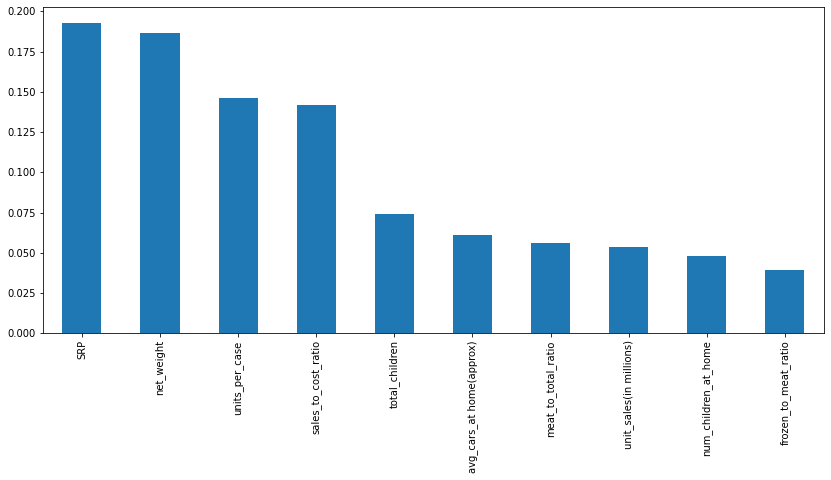

In [23]:
pd.Series(model_rf.feature_importances_,index = X.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (14,6))

Setting a threshold of approximately 5 percent for relative feature importances, we will not include frozen_to_meat_ratio as a predictor in our models.

We will now experiment with all the remaining attributes.

In [24]:
X_new = df.drop(['frozen_to_meat_ratio'], axis = 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.ensemble import RandomForestRegressor

randomforest = RandomForestRegressor(random_state = 0, max_features = 10, n_estimators = 1000)
model_rf_new = randomforest.fit(X_train_new, y_train)
y_test_pred_new = model_rf_new.predict(X_test_new)

In [27]:
model_rf_new.feature_importances_

array([0.02432087, 0.0414079 , 0.03514322, 0.02514641, 0.06979422,
       0.06852171, 0.05932887, 0.05475415, 0.03284652, 0.01285681,
       0.01170734, 0.00804376, 0.00769363, 0.0053059 , 0.00522739,
       0.00696783, 0.26246798, 0.00992044, 0.00837424, 0.0067953 ,
       0.00568314, 0.01266664, 0.01559705, 0.00519795, 0.01057452,
       0.00695399, 0.00982177, 0.00797613, 0.00890982, 0.00783686,
       0.00842838, 0.01028628, 0.00973657, 0.01026926, 0.01550648,
       0.00483292, 0.00511917, 0.00349981, 0.00996853, 0.00930915,
       0.00767041, 0.00507606, 0.00377875, 0.00297894, 0.00162203,
       0.00472031, 0.00540425, 0.00188149, 0.00208712, 0.00040537,
       0.01097741, 0.00153096, 0.00618515, 0.00418405, 0.00669877])

In [28]:
X_new.columns.to_numpy()

array(['unit_sales(in millions)', 'total_children',
       'avg_cars_at home(approx)', 'num_children_at_home', 'SRP',
       'net_weight', 'units_per_case', 'sales_to_cost_ratio',
       'meat_to_total_ratio', 'recyclable_package', 'low_fat',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'media_type_labeled', 'food_family_Food',
       'food_family_Non-Consumable', 'sales_country_Mexico',
       'sales_country_USA', 'marital_status_S', 'gender_M',
       'education_Graduate Degree', 'education_High School Degree',
       'education_Partial College', 'education_Partial High School',
       'member_card_Golden', 'member_card_Normal', 'member_card_Silver',
       'occupation_Management', 'occupation_Manual',
       'occupation_Professional', 'occupation_Skilled Manual',
       'houseowner_Y', 'avg. yearly_income_$110K - $130K',
       'avg. yearly_income_$130K - $150K', 'avg. yearly_income_$150K +',
       'avg. yearly_income_$30K - $50K', 'avg. yearl

In [29]:
feature_significances = pd.DataFrame(data = model_rf_new.feature_importances_, index = X_new.columns.to_numpy(), columns = ['feature significance'])
feature_significances.sort_values('feature significance', ascending = False)

,feature significance
media_type_labeled,0.262468
SRP,0.069794
net_weight,0.068522
units_per_case,0.059329
sales_to_cost_ratio,0.054754
total_children,0.041408
avg_cars_at home(approx),0.035143
meat_to_total_ratio,0.032847
num_children_at_home,0.025146
unit_sales(in millions),0.024321


In [30]:
from sklearn.metrics import mean_squared_error
forest_all_mse = mean_squared_error(y_test, y_test_pred_new, squared=False)
forest_all_mse

18.342746102188986

Therefore, we will select variables with a feature importance of greater than or equal to 0.015 as our predictors.

In [31]:
X_final = df[['media_type_labeled', 'SRP', 'net_weight', 'units_per_case', 'sales_to_cost_ratio', 'total_children', 'avg_cars_at home(approx)', 'meat_to_total_ratio',
              'num_children_at_home', 'unit_sales(in millions)', 'gender_M', 'houseowner_Y']]

# Model Development

In [32]:
X_train_final, X_test_final, y_train, y_test = train_test_split(X_final, y, test_size = 0.3, random_state = 0)

In [33]:
X_test_final, X_val_final, y_test, y_val = train_test_split(X_test_final, y_test, test_size = 0.5, random_state = 0)

## Baseline Model

In [ ]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
base_model = dr.fit(X_train_final, y_train)
y_test_pred_base = base_model.predict(X_test_final)

In [ ]:
base_mse = mean_squared_error(y_test, y_test_pred_base, squared=False)
base_mse

28.78270510107593

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0, max_features = 10, max_depth = 5)
model_dt_final = dt.fit(X_train_final, y_train)
y_test_pred_final = model_dt_final.predict(X_test_final)

In [ ]:
decisiontree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
decisiontree_pred_mse

26.6621484277199

## Random Forest

In [35]:
randomforest = RandomForestRegressor(random_state = 0)
model_rf_final = randomforest.fit(X_train_final, y_train)
y_test_pred_final = model_rf_final.predict(X_test_final)

In [36]:
randomforest_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
randomforest_pred_mse

18.093379115761447

## Extra Tree

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
extratree = ExtraTreesRegressor(random_state = 0)
model_et_final = extratree.fit(X_train_final, y_train)
y_test_pred_final = model_et_final.predict(X_test_final)

In [35]:
extratree_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
extratree_pred_mse

15.769998049578723

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), random_state = 0, n_estimators = 1000)
model_ab_final = adaboost.fit(X_train_final, y_train)
y_test_pred_final = model_ab_final.predict(X_test_final)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
adaboost_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
adaboost_pred_mse

20.73169465771999

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 0)
model_gb_final = gb.fit(X_train_final, y_train)
y_test_pred_final = model_gb_final.predict(X_test_final)

In [ ]:
gb_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
gb_pred_mse

24.65856043263424

# LightGBM

In [ ]:
import lightgbm as ltb
lgbm = ltb.LGBMRegressor(random_state = 0)
model_lgbm_final = lgbm.fit(X_train_final,y_train)
y_test_pred = model_lgbm_final.predict(X_test_final)

In [ ]:
lgbm_mse = mean_squared_error(y_test, y_test_pred, squared=False)
lgbm_mse

20.05655239345082

# XGBoost

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(random_state = 0)
model_xgbr_final = xgbr.fit(X_train_final,y_train)
y_test_pred = model_xgbr_final.predict(X_test_final)

In [ ]:
xgbr_mse = mean_squared_error(y_test, y_test_pred, squared=False)
xgbr_mse

19.54910989606652

## Artificial Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(hidden_layer_sizes = (20), max_iter = 2000, random_state = 0)
model_ann_final = ann.fit(X_train_final, y_train)
y_test_pred_final = model_ann_final.predict(X_test_final)

In [ ]:
ann_pred_mse = mean_squared_error(y_test, y_test_pred_final, squared=False)
ann_pred_mse

28.333788661188553

# Model Selection and Cross Validation

According to the results, the Extra Tree model performs the best since it has the lowest MSE. Therefore, we will chose it as our final model and do cross-validation.



In [36]:
final_model = model_et_final

In [37]:
# According to the size of our dataset, we will divide it to 10 folds for cross-validation
from sklearn.model_selection import cross_val_score
final_model.fit(X_train_final, y_train)
et_mses = -cross_val_score(final_model, X_test_final, y_test, scoring="neg_root_mean_squared_error", cv=10)

In [38]:
pd.Series(et_mses).describe()

count    10.000000
mean     19.831945
std       0.603191
min      19.174206
25%      19.306427
50%      19.659418
75%      20.311887
max      20.782267
dtype: float64

In [39]:
final_model.fit(X_train_final, y_train)
final_predictions = final_model.predict(X_test_final)
final_mse = mean_squared_error(y_test, final_predictions, squared=False)
final_mse

15.769998049578723

# Hyperparameter Optimization

HyperOpt

In [40]:
! pip install hyperopt

In [67]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

param_space = {
    'n_estimators': hp.choice('n_estimators', range(100, 505, 100)),
    'max_depth': hp.choice('max_depth', range(3, 11)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 6)),
    'max_features': hp.choice('max_features', ['auto', 'sqrt'])
}

In [68]:
def objective(params):
    model = ExtraTreesRegressor(random_state = 0, **params)
    score = -1.0 * cross_val_score(model, X_train_final, y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return score

In [69]:
trials = Trials()
best = fmin(objective, param_space, algo=tpe.suggest, max_evals=50, trials=trials)

  2%|▏         | 1/50 [00:06<05:37,  6.88s/trial, best loss: 808.1289003766308]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

  8%|▊         | 4/50 [00:25<04:41,  6.12s/trial, best loss: 632.8731338824633]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 10%|█         | 5/50 [00:39<06:48,  9.08s/trial, best loss: 632.8731338824633]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 12%|█▏        | 6/50 [00:57<08:51, 12.08s/trial, best loss: 632.8731338824633]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 14%|█▍        | 7/50 [01:02<06:56,  9.69s/trial, best loss: 632.8731338824633]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 18%|█▊        | 9/50 [01:22<06:40,  9.77s/trial, best loss: 434.06322198995997]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 26%|██▌       | 13/50 [02:16<06:49, 11.06s/trial, best loss: 434.06322198995997]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 34%|███▍      | 17/50 [02:57<05:25,  9.85s/trial, best loss: 434.06322198995997]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 36%|███▌      | 18/50 [03:03<04:37,  8.66s/trial, best loss: 434.06322198995997]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 40%|████      | 20/50 [03:26<04:54,  9.81s/trial, best loss: 434.06322198995997]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 42%|████▏     | 21/50 [03:57<07:47, 16.12s/trial, best loss: 433.1935503647375] 

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 44%|████▍     | 22/50 [04:27<09:29, 20.32s/trial, best loss: 433.1935503647375]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 46%|████▌     | 23/50 [04:58<10:32, 23.43s/trial, best loss: 433.1935503647375]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 48%|████▊     | 24/50 [05:28<11:05, 25.58s/trial, best loss: 433.1935503647375]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 50%|█████     | 25/50 [05:59<11:16, 27.07s/trial, best loss: 433.1935503647375]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 52%|█████▏    | 26/50 [06:23<10:26, 26.12s/trial, best loss: 433.1935503647375]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 54%|█████▍    | 27/50 [06:50<10:08, 26.46s/trial, best loss: 433.1935503647375]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 56%|█████▌    | 28/50 [07:23<10:29, 28.60s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 58%|█████▊    | 29/50 [07:58<10:36, 30.31s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 60%|██████    | 30/50 [08:32<10:27, 31.36s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 62%|██████▏   | 31/50 [09:06<10:10, 32.13s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 64%|██████▍   | 32/50 [09:39<09:47, 32.64s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 66%|██████▌   | 33/50 [10:35<11:13, 39.63s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 68%|██████▊   | 34/50 [10:58<09:11, 34.46s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 70%|███████   | 35/50 [11:31<08:33, 34.25s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 72%|███████▏  | 36/50 [11:46<06:35, 28.27s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 74%|███████▍  | 37/50 [12:08<05:45, 26.55s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 76%|███████▌  | 38/50 [12:32<05:07, 25.62s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 78%|███████▊  | 39/50 [12:42<03:52, 21.16s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 80%|████████  | 40/50 [13:00<03:20, 20.06s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 82%|████████▏ | 41/50 [13:45<04:07, 27.50s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 86%|████████▌ | 43/50 [14:32<02:51, 24.45s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 90%|█████████ | 45/50 [15:24<01:57, 23.51s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 94%|█████████▍| 47/50 [15:51<00:52, 17.57s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

 96%|█████████▌| 48/50 [16:28<00:46, 23.21s/trial, best loss: 388.00068355020085]

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomFores

100%|██████████| 50/50 [16:49<00:00, 20.19s/trial, best loss: 388.00068355020085]


In [70]:
print("Best hyperparameters:")
print(best)

Best hyperparameters:
{'max_depth': 7, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 7, 'n_estimators': 2}


In [72]:
et_hyper_opt = ExtraTreesRegressor(random_state = 0, min_samples_leaf= 1, min_samples_split= 9, max_depth = 10, n_estimators = 300, max_features = 'auto')
model_et_hyper_opt = et_hyper_opt.fit(X_train_final, y_train)
y_val_pred_hyper_opt = model_et_hyper_opt.predict(X_val_final)

C:\Users\raman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [73]:
extratree_hyper_opt_mse = mean_squared_error(y_val, y_val_pred_hyper_opt, squared=False)
extratree_hyper_opt_mse

19.79153827496497